In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('seaborn-v0_8-darkgrid')  # Optional aesthetic style


# 1. Introduction


Trong hành trình nhận thức quy luật, nhân loại đã liên tục đối mặt với những nghịch lý buộc chúng ta phải tái định nghĩa các khái niệm tưởng chừng bất biến. Trong vật lý cổ điển, thế giới được mô tả như một cỗ máy khổng lồ vận hành theo các quy tắc xác định, nơi mọi vật thể từ hạt bụi đến thiên hà tồn tại độc lập với ý thức con người. Quan điểm này, được xây dựng từ thời Galileo và Newton, xem sự bất định chỉ là hệ quả của việc thiếu thông tin hoặc công cụ đo lường hạn chế. Ví dụ, mặt trăng luôn hiện hữu với vị trí và vận tốc cụ thể dù có ai quan sát hay không; nhiệm vụ của khoa học là "vén màn" những thông tin ẩn giấu đó. Thế nhưng, cuộc cách mạng lượng tử vào đầu thế kỷ XX đã phá vỡ hoàn toàn tư duy này. Thí nghiệm hai khe Young, nguyên lý bất định Heisenberg, và nghịch lý con mèo của Schrödinger hé lộ một sự thật gây chấn động: ở thang vi mô, hạt vật chất không có trạng thái cố định cho đến khi được đo đạc. Chúng tồn tại trong một "đám mây xác suất" — trạng thái chồng chập của nhiều khả năng — và chỉ "sụp đổ" thành hiện thực khi tương tác với hệ đo. Điều này không chỉ thách thức tính khách quan của thực tại mà còn đặt ra câu hỏi triết học sâu sắc: Liệu ý thức có đóng vai trò "tạo ra" thế giới vật chất, hay thế giới tồn tại độc lập với nhận thức?

Tương tự như vậy, trong lĩnh vực tài chính, từ lâu, các mô hình kinh tế cổ điển xem giá cả như một con số duy nhất, phản ánh "giá trị thực" của tài sản dựa trên thông tin sẵn có. Sự dao động giá được quy cho các yếu tố ngoại sinh: tin tức, biến động vĩ mô, hoặc tâm lý đám đông. Tuy nhiên, thực tế thị trường không hẳn hoạt động như vậy. Giá mà chúng ta thấy là giá khi mà lệnh mua và lệnh bán khớp nhau. Trước mỗi giao dịch, giá không phải là một điểm cố định, mà là một trường xác suất: người mua đặt giá bid, người bán chào giá ask. Sự tồn tại đồng thời của nhiều mức giá là bản chất nội tại của thị trường — nơi mỗi cá nhân mang theo kỳ vọng, chiến lược, và mức độ sẵn sàng chấp nhận rủi ro khác nhau. Và sự bất định là do bản thân nội tại của nó chứ không phải là do sự thiếu thông tin. Điều này khiến giá cả, giống như hạt lượng tử, chỉ "hiện thực hóa" khi có sự tương tác (giao dịch), và trước đó, nó tồn tại dưới dạng một trạng thái mờ (fuzzy state) của nhiều khả năng.

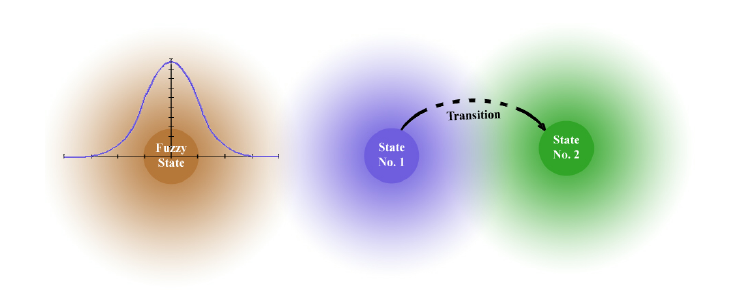

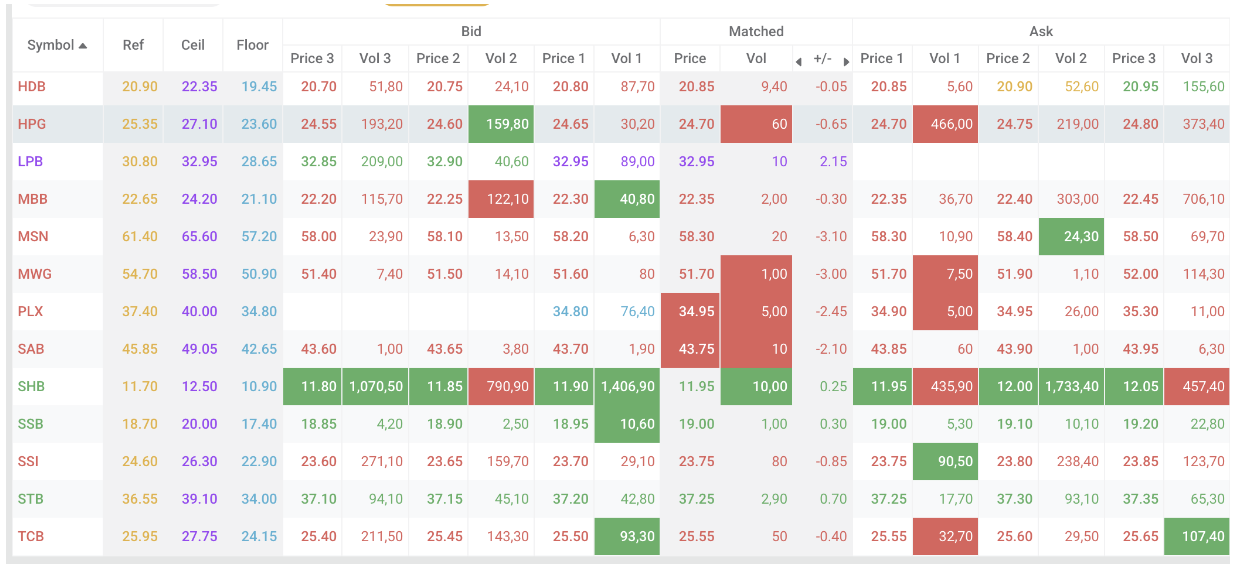

Trong bài viết này, chúng tôi đề xuất một khung mô hình lượng tử để phân tích động lực giá tài chính. Bằng cách xem giá bid và ask như hai trạng thái riêng (eigenstates) trong không gian Hilbert của hệ thống, chúng tôi mã hóa sự tương tác giữa người mua và người bán thành các toán tử tác động lên trạng thái chồng chập. Để đơn giản hóa, mô hình chỉ xét hai mức giá bid cao nhất và ask thấp nhất. Kết quả thử nghiệm trên dữ liệu thị trường chứng khoán cho thấy, mô hình không chỉ tái tạo được các đặc tính thống kê của bid-ask spread mà còn dự đoán được xác suất "chuyển pha" giữa trạng thái cân bằng và mất cân bằng.

Ý nghĩa của nghiên cứu vượt ra ngoài việc ứng dụng công cụ vật lý vào tài chính. Nó gợi mở một cách tiếp cận liên ngành để xem xét các hệ thống xã hội — nơi tính chủ quan, bất định nội tại, và tương tác phi tuyến đóng vai trò trung tâm. Đồng thời, nghiên cứu cũng đặt lại câu hỏi về ranh giới giữa "khách quan" và "chủ quan" trong khoa học: Liệu có tồn tại một "giá trị thực" tuyệt đối của tài sản, hay giá cả chỉ là hệ quả của quá trình tương tác giữa các thực thể nhận thức?


# 2. Hạn Chế của Các Mô Hình Tài Chính Định Lượng Truyền Thống

Các mô hình tài chính đương đại chủ yếu được phát triển dựa trên phương pháp tiếp cận *bottom-up* (từ dưới lên), xuất phát từ những giả định cơ bản rồi dần bổ sung các yếu tố phức tạp hóa. Tuy nhiên, phương pháp luận này tiềm ẩn hai nghịch lý đáng quan ngại:

- **Tích tụ các giả định thiếu chính xác**: Mỗi lớp giả định sai lệch được thêm vào làm gia tăng tính võ đoán của mô hình, khiến nó dần tách rời khỏi thực tiễn thị trường. Hiệu ứng "tích lũy sai số" này làm suy giảm năng lực mô tả bản chất động lực học tài chính.
- **Khuyết thiếu tính khái quát hóa**: Việc tối ưu hóa mô hình theo hướng khớp dữ liệu lịch sử (*overfitting*) thường làm mất đi khả năng đại diện cho toàn hệ thống. Một mô hình chuẩn mực cần hội tụ về *phương trình tổng quát* có khả năng giải thích đa hiện tượng, thay vì chỉ tái hiện các mẫu hình cục bộ.

Đặc thù của hệ thống tài chính — nơi hành vi con người chịu ảnh hưởng đa chiều từ các quy luật xã hội — khiến nó mang bản chất của *khoa học xã hội ứng dụng*. Do đặc thù này, tiêu chuẩn kiểm định giả thuyết thường bị nới lỏng, dẫn đến xu hướng đánh đồng việc tìm kiếm *tương đồng thống kê* (statistical similarity) với việc phát hiện *quy luật nhân quả* (causal mechanism).

> "Similarity Proves Nothing"
> 

Nhiều nhà nghiên cứu lạm dụng các mô hình toán học phức tạp để "fit" với hành vi thị trường trong quá khứ (train), với giả định rằng tương lai (test) sẽ tương tự như vậy. Tuy nhiên, các mô hình này thường *không thể kiểm chứng thực nghiệm*, bởi sự kết hợp giữa lý luận logic và các giả thuyết hợp lý không phải lúc nào cũng đồng nghĩa với tính đúng đắn. Khi mô hình không dự đoán chính xác, thay vì điều chỉnh các giả định, người ta lại *đổ lỗi cho thị trường là “thiếu hiệu quả” (market inefficiency)* để bảo vệ mô hình.


## 2.1. Giới Hạn của Giải Tích Ngẫu Nhiên

Giải tích ngẫu nhiên, đặc biệt là các mô hình dựa trên chuyển động Brown, đã trở thành nền tảng của nhiều lý thuyết tài chính hiện đại như mô hình Black-Scholes, mô hình hóa danh mục, hay đo lường rủi ro theo VaR. Tuy nhiên, khi áp dụng vào cấp độ vi mô của thị trường, những mô hình này bộc lộ nhiều giới hạn nghiêm trọng:

- **Giả định về giá mua và giá bán trùng nhau**: Phần lớn mô hình cổ điển không tính đến *bid-ask spread*, trong khi thực tế luôn tồn tại sự chênh lệch này.
- **Đánh giá sai rủi ro ngắn hạn**: Các mô hình như VaR cho rằng rủi ro tại thời điểm *t = 0* là bằng 0, bất chấp thực tế có sự chênh lệch giữa giá mua và giá bán ngay tại thời điểm đó.
- **Thiếu khả năng mô hình hóa tác động thị trường**: Những mô hình này không giải thích được việc các lệnh lớn có thể ảnh hưởng trực tiếp đến giá thị trường.

## 2.2. Những Thách Thức Thực Tiễn Trong Thị Trường Tài Chính

- **Tạo lập thị trường (Market Making)**: 
Các nhà tạo lập thị trường kiếm lợi từ bán giá cao - ask và mua giá thấp - bid (điều đó tạo ra lợi nhuận từ bid-ask spread). Nếu mà spread cao, thì lệnh sẽ khớp khó hơn, lâu hơn ⇒ Số lượng lệnh được thực hiện ít (turnover thấp) ⇒ Profit có thể thấp
    
    Nếu bid-ask thấp thì lệnh được thực hiện nhiêu hơn (turnover cao). Tuy nhiên tổng lợi nhuận từ mỗi lệnh cũng có thể ít ⇒ Chọn spread phù hợp như hình dưới
    
    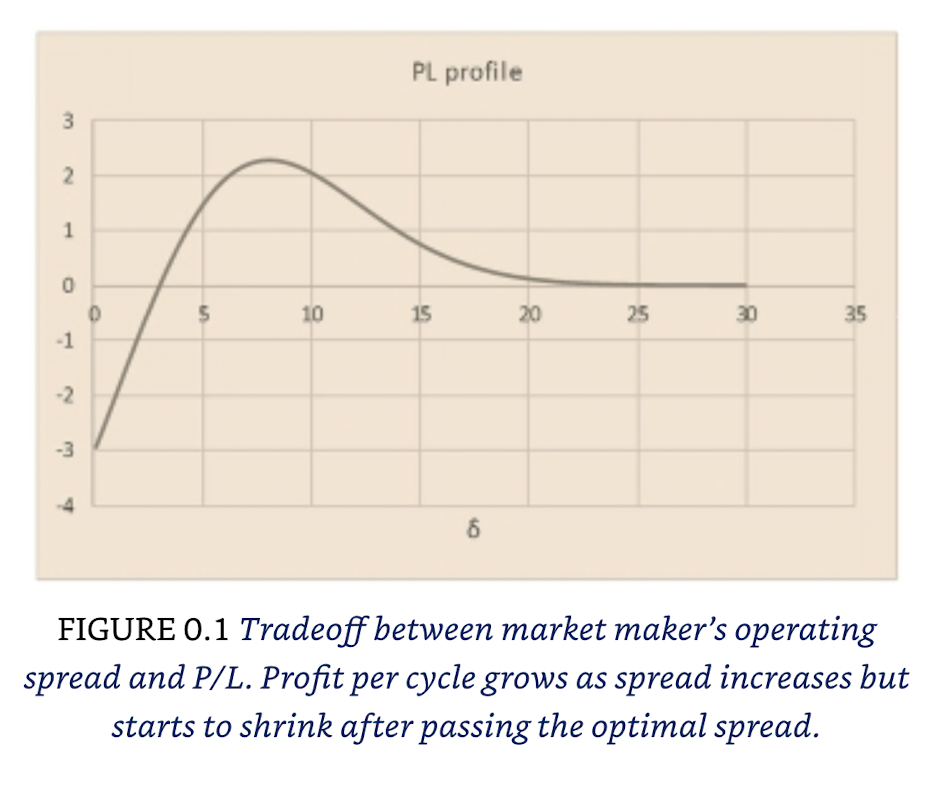
    
- **Bộ phận Sales & Trading:** Khi các tổ chức tài chính muốn thực hiện các lệnh giao dịch với khối lượng lớn, các lệnh này thường có khả năng **gây ảnh hưởng đến giá thị trường**. Nhiệm vụ của bộ phận Sales & Trading là **thực hiện các lệnh đó một cách hiệu quả**, sao cho **tác động đến giá là tối thiểu** — thường bằng cách **chia nhỏ lệnh theo thời gian**, kết hợp nhiều chiến thuật khác.
    
    Tuy nhiên, hiểu biết về **order execution** không chỉ dừng lại ở việc chia nhỏ lệnh. Quan trọng hơn là **khả năng dự đoán cách thị trường phản ứng**, dựa trên **độ sâu thị trường**, khả năng **phát hiện thanh khoản ẩn**, và phân biệt được **thanh khoản thực sự** với các lệnh **giả tạo hoặc thoáng qua** (ví dụ như lệnh chỉ đặt rồi rút nhanh). Những yếu tố này có vai trò then chốt trong việc đảm bảo chất lượng khớp lệnh.
    
- **Giao dịch REPO**: Khi một quỹ đầu tư muốn sử dụng cổ phiếu để thế chấp, đối với các chứng khoán nợ như là trái phiếu chính phủ rất an toàn thì việc tính toán giá trị rất dễ. Đối với cổ phiếu nó khó hơn nhiều, việc xác định **haircut (discount rate)** trở nên khó khăn hơn nhiều. Các phương pháp định lượng chuẩn như **Value-at-Risk (VaR)** hoặc **Expected Shortfall** là **chưa đủ**, vì chúng thường **bỏ qua rủi ro thanh khoản**. Trong trường hợp khách hàng không trả được, bạn sẽ phải **bán một khối lượng lớn cổ phiếu trong một thị trường kém thanh khoản**, điều này có thể khiến giá giảm mạnh. Rủi ro thanh khoản này cần được phản ánh rõ trong mức haircut.
- **Trading**: Trader thấy vị thế hiện đang có lời trên terminal và quyết định chốt lời bằng cách **gửi lệnh thị trường (market order) để thanh lý toàn bộ vị thế**. Tuy nhiên, vị thế này chiếm tới **10% khối lượng giao dịch trung bình mỗi ngày**, nên việc khớp lệnh mất thời gian.
    
    Khi quá trình thanh lý hoàn tất, trader phát hiện rằng **thay vì có lãi, anh ta lại chịu lỗ**. Nguyên nhân là vì **terminal báo P/L dựa trên giá thị trường hiện tại**, vốn được hình thành từ các **giao dịch khối lượng nhỏ (100–200 cổ phiếu)**. Nhưng khi bán ra với khối lượng lớn, **chính việc thanh lý đã đè giá thị trường xuống theo thời gian**, khiến **giá khớp thực tế thấp hơn đáng kể** so với giá hiển thị.
    
    Kết quả là P/L thực tế khác hoàn toàn so với kỳ vọng ban đầu. Trường hợp này cho thấy **việc định giá vị thế dựa vào giá niêm yết không phản ánh đúng giá trị có thể hiện thực hóa**, đặc biệt trong thị trường thanh khoản mỏng. (**Việc chia nhỏ lệnh bán có thể giúp hạn chế tác động giá, nhưng lại mất thời gian và vẫn không đảm bảo duy trì được giá khớp ban đầu.**)
    
- **Asset management: Định giá khối lượng lớn không thể chỉ nhìn vào giá "niêm yết"**
    
    Giả sử một đối tác giao dịch biết rằng bạn đang nắm giữ một **trái phiếu cụ thể** trong danh mục và họ muốn mua **25% tổng khối lượng phát hành**. Họ liên hệ để đàm phán điều kiện giao dịch.
    
    - **Giao dịch gần nhất với khối lượng tương đương đã diễn ra cách đây 2 tháng**.
    - Hiện tại vẫn có các giao dịch nhỏ lẻ mỗi vài ngày, và **thanh khoản sổ sách** (liquidity in the book) chỉ khoảng **3% so với khối lượng cần bán**.
    - **Biến động lãi suất thị trường cho phép lệch khoảng vài điểm basis (bp)** mỗi bên.
    - Bạn cũng biết rằng **chỉ có 3 tổ chức khác đang nắm giữ khối lượng đáng kể**.
    
    **Vấn đề đặt ra:** Làm sao để **định giá hợp lý** cho khối lượng lớn này và **thuyết phục bên kia rằng mức giá là công bằng**?
    
    Trong thực tế, **các mô hình định giá xác suất (stochastic pricing)** chỉ đưa ra một “giá công bằng” duy nhất, **không quan tâm đến quy mô giao dịch**. Theo mô hình, **bán một block 60 triệu đô được định giá y như bán lô 6.000 đô** — điều này rõ ràng **không thực tế**.
    
    Cuối cùng, **giá vẫn phải được điều chỉnh bằng tay hoặc thông qua mô hình kinh nghiệm**, và phần lớn là không giải thích được gì.
    
    **Giải pháp đúng đắn là phải xây dựng một khung định lượng (quantitative framework) trong đó giá tự động phản ánh kích thước lệnh** – thay vì phải gán ghép thêm hệ số điều chỉnh sau. Khi đó, **giá là hàm của trade size một cách tự nhiên**, phản ánh đúng bản chất thanh khoản và ảnh hưởng của giao dịch lớn lên thị trường.
    
- **Risk: Báo cáo đẹp không ngăn được thua lỗ**
    
    Nhiều phòng quản trị rủi ro (risk departments) xem công việc của mình đơn thuần là **tính toán xác suất, thống kê danh mục và trình bày báo cáo**. Miễn là có phân phối xác suất, có VaR, có báo cáo đẹp – coi như “xong việc”. Nhưng mục tiêu thật sự của quản trị rủi ro là **ngăn chặn thua lỗ**, không phải “ghi nhận lại những gì đã xảy ra”.
    
    Thực tế cho thấy khi xảy ra thua lỗ, **con số thực tế thường vượt xa mọi dự báo**. Một lý do quan trọng là rủi ro đang được ước lượng **dựa trên giá giao dịch khối lượng nhỏ**, trong khi các vị thế lớn nếu phải thanh lý sẽ **tác động trực tiếp lên giá thị trường**. **Nếu đánh giá rủi ro mà bỏ qua market impact, tức là đánh giá sai.** Hậu quả là **thua lỗ thực tế lớn hơn nhiều so với dự kiến.**
    
    Một chiêu thường thấy: **“lấp khoảng trống thanh khoản” (gap-filling)**. Với các tài sản kém thanh khoản, **dữ liệu bị thiếu được giả lập (fill)** rồi **ghép chung với tài sản thanh khoản để tính VaR và shortfall**. Thay vì **trình bày rõ cấu trúc thanh khoản trong danh mục**, và **ước lượng sát rủi ro từ tác động giá và khả năng không khớp lệnh**, người ta lại **biến đổi dữ liệu cho tiện tính toán**. Và điều đó không giúp gì trong việc **phòng ngừa thua lỗ thật sự.**
    
- **Options: Tài sản cơ sở kém thanh khoản – rủi ro nhân đôi**
    
    Với options, mọi thứ vốn đã phức tạp, nhưng nếu tài sản cơ sở là một **tài sản kém thanh khoản**, thì vấn đề trở nên **khó hơn một bậc**.
    
    - **Động lực giá của underlying vốn đã không rõ ràng**.
    - **Quyền lợi của người nắm giữ option giờ phụ thuộc vào quy mô thực thi** – vì thanh khoản ảnh hưởng trực tiếp tới giá khớp.
    - Tệ hơn nữa, **giá không chắc chắn kéo theo toàn bộ các chỉ số Greek cũng trở nên không chắc chắn**, khiến việc phòng hộ (hedging) trở nên bất ổn và có thể sai lệch nghiêm trọng.
    
    Muốn mô hình hóa loại option này, không thể chỉ dùng các mô hình xác suất cổ điển. **Phải đưa vào được cơ chế giá bid-ask khác nhau, mô hình hóa đúng spread, và phải hiểu được xác suất gắn liền với cấu trúc thanh khoản thực tế**. Đây là vùng đất mà stochastic calculus **không thể bao phủ hết được** – đặc biệt trong thực chiến với các tài sản ít giao dịch, thường thấy ở các desk exotic hoặc môi trường thị trường mới nổi.
    

> "Các mô hình không tồi — chúng chỉ trở nên nguy hiểm khi ta tin tưởng mù quáng vào chúng."
> 

## 2.3. Giới Hạn của GBM

Trong khung lý thuyết cổ điển, giá tài sản tại mỗi thời điểm tt được mô tả bằng một đại lượng ngẫu nhiên duy nhất, ví dụ như trong mô hình chuyển động Brown hình học (GBM):

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t,
$$

$$
\Rightarrow S_t = S_0 \exp \left( \left( \mu - \frac{\sigma^2}{2} \right) t + \sigma W_t \right)
$$

Giá StS_t được xem là tồn tại khách quan, độc lập với hành vi đo lường — nghĩa là luôn tồn tại một giá thực (realized price), mà mô hình chỉ cần ước lượng hoặc lấy mẫu.

Tuy nhiên, trong các tình huống thực tế nêu trên, việc “giá thực” là một đại lượng duy nhất không còn phù hợp. Giá phụ thuộc vào cách thức đo (cách lệnh được thực hiện), vào khối lượng lệnh, vào phản ứng của thị trường, và cả vào cấu trúc thanh khoản tại thời điểm đó.

**Vấn đề: Thiếu một khung lý thuyết phản ánh quá trình đo lường và tương tác**

Các mô hình cổ điển giả định rằng hành vi đo lường không ảnh hưởng đến kết quả — một giả định đã từng bị thách thức trong vật lý hiện đại. Để mô tả chính xác hơn hành vi thị trường thực tế, cần một khung lý thuyết mới, trong đó:

- Giá không còn là đại lượng tuyệt đối, mà là kết quả của quá trình đo lường.
- Thanh khoản và tương tác thị trường phải được nội hóa trong mô hình toán học.
- Tác động của hành vi giao dịch lên chính hệ thống cần được tính đến.

Điều này dẫn đến nhu cầu xem xét một hướng tiếp cận mới — **hướng tiếp cận lượng tử trong tài chính** — nơi mà bản thân việc đo lường có thể làm thay đổi trạng thái hệ thống, và các đại lượng tài chính cần được mô hình hóa như các toán tử trên không gian trạng thái, chứ không chỉ là các biến số ngẫu nhiên truyền thống.

# 3. Tổng quan lý thuyết về cơ học lượng tử

## **3.1. Không gian Vector trong Cơ học Lượng tử**

[**Không gian chuẩn hóa (Normed Spaces)**](https://www.notion.so/Kh-ng-gian-chu-n-h-a-Normed-Spaces-7d55658016334c08a4a15700bb2fd54d?pvs=21) 

[**Không Gian Hilbert**](https://www.notion.so/Kh-ng-Gian-Hilbert-1b7bda48ee8980499010ef9e3484eb20?pvs=21) 

[**Không gian $L^p$ (L Spaces)**](https://www.notion.so/Kh-ng-gian-L-p-L-Spaces-c22153081b0d44f9bd09a2d899f05e8a?pvs=21) 

Trong cơ học lượng tử, các trạng thái lượng tử không được biểu diễn bằng vector hữu hạn chiều mà bằng **hàm sóng** thuộc **không gian Hilbert vô hạn chiều**. Các trạng thái lượng tử không được biểu diễn dưới dạng các vector có số chiều hữu hạn, mà thay vào đó, chúng được mô tả bằng các **hàm số**. Những hàm này có thể được coi là các phần tử trong không gian vô hướng, và các toán tử được áp dụng lên chúng theo những quy tắc toán học đặc trưng của lý thuyết lượng tử.

Một **hàm số** $f: \mathbb{R} \to \mathbb{C}$ được gọi là **Square-integrable** (có thể tích phân được bình phương) nếu tích phân của bình phương của nó trên toàn bộ khoảng không gian, tức là từ $-\infty$ đến $+\infty$, là hữu hạn. Điều này có nghĩa là:

$$
f:\R\to \mathbb{C} \Lrarr \int^{\infty}_{-\infty}|f(x)|^2dx<\infty
$$

Ở đây, $|f(x)|^2$ đại diện cho độ lớn bình phương của giá trị tuyệt đối của hàm số $f(x)$, và tích phân này phải có giá trị hữu hạn để hàm số đó là "Square-integrable."

Không gian các hàm **Square-integrable** được gọi là không gian **$L^2$ (space)**, ký hiệu là $L^2(\mathbb{R})$, và đây là một không gian vector. Tuy nhiên, không gian này không phải là một không gian vector thông thường mà là một không gian Hilbert.

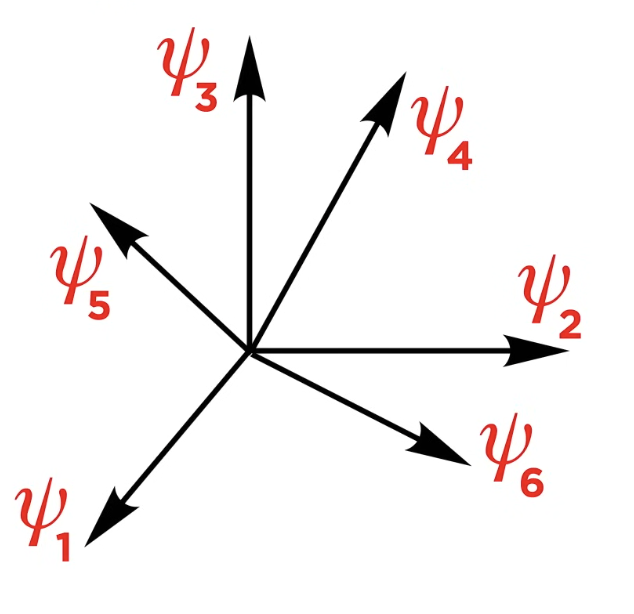

Không gian **Hilbert** là một không gian vector đặc biệt, trong đó có một phép inner product, và các phép toán trong không gian này tuân theo các định lý cơ bản của giải tích và đại số tuyến tính. Các hàm trong không gian Hilbert có thể được "đo lường" bằng cách sử dụng phép inner product, và các tính chất như tính hoàn chỉnh và sự hội tụ của dãy hàm được đảm bảo trong không gian này.

Do đó, trong cơ học lượng tử, không gian Hilbert đóng vai trò quan trọng trong việc mô tả các trạng thái lượng tử, vì nó cung cấp một nền tảng toán học vững chắc để mô phỏng và phân tích các hệ thống lượng tử phức tạp.

**Đại số tuyến tính trong không gian Hilbert (vô hạn chiều)**

- Vector trạng thái $|\alpha\rangle$ tương ứng với hàm sóng $\psi_\alpha(x)$.
- **Tích trong** (inner product):
    
    $$
    
    \langle\beta|\alpha\rangle \equiv \int_{-\infty}^{\infty} \psi_{\beta}^*(x) \psi_{\alpha}(x) \, dx
    
    $$
    
- **Điều kiện chuẩn hóa**:
    
    $$
    
    \langle\alpha|\alpha\rangle = \int_{-\infty}^{\infty} \psi_{\alpha}^*(x) \psi_{\alpha}(x) \, dx = 1
    
    $$
    
- **Tính trực giao**:
    
    $$
    
    \langle\alpha|\beta\rangle = 0 \Leftrightarrow \int_{-\infty}^{\infty} \psi_{\alpha}^*(x) \psi_{\beta}(x) \, dx = 0
    
    $$
    
- **Tính đầy đủ của hệ cơ sở (completeness)**
    
    Mọi vector trạng thái  $|\psi\rangle$  trong không gian Hilbert có thể khai triển thành tổ hợp tuyến tính của hệ cơ sở đầy đủ $\{ |\psi_n\rangle \}:$
    
    $$
    
    |\psi\rangle = \sum_{n=1}^{\infty} a_n |\psi_n\rangle
    
    $$
    
    với hệ số khai triển:
    
    $$
    
    a_n = \langle\psi_n|\psi\rangle
    
    $$


## **3.2. Các Tiên Đề trong Cơ Học Lượng Tử**

Cơ học lượng tử được xây dựng dựa trên một hệ thống các tiên đề mô tả các quy luật và hành vi của các hệ thống lượng tử. Dưới đây là các tiên đề quan trọng trong cơ học lượng tử.

---

### **Tiên Đề 1: Mô Tả Trạng Thái Lượng Tử Bằng Hàm Sóng**

Trong cơ học lượng tử, trạng thái của một hệ vật lý được biểu diễn bằng một **hàm sóng** $\psi(\mathbf{r}, t)$, tồn tại trong không gian Hilbert vô hạn chiều. Hàm sóng này mã hóa toàn bộ thông tin vật lý của hệ, bao gồm phân bố xác suất của các đại lượng quan sát được.

**Đặc Trưng Toán Học Của Hàm Sóng**
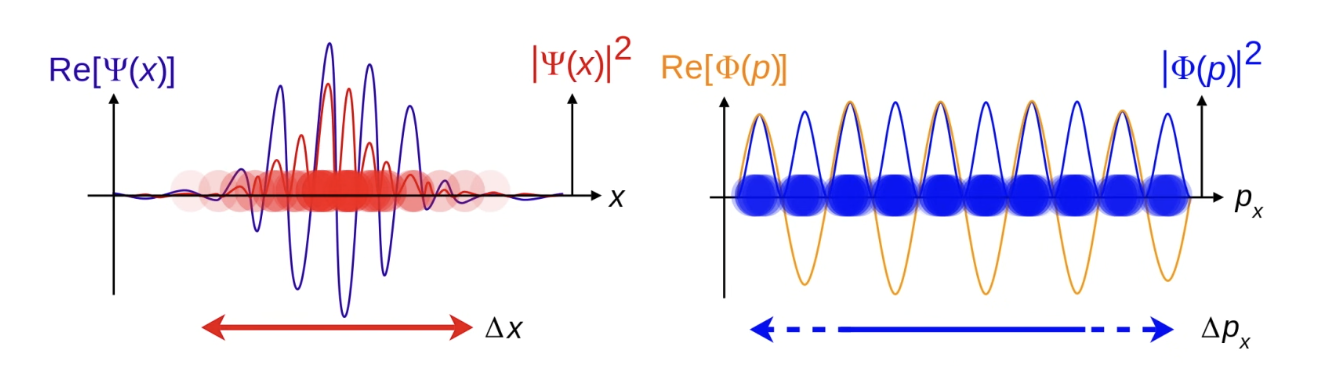
1. **Diễn giải xác suất**:
Bình phương độ lớn của hàm sóng,  $|\psi(\mathbf{r}, t)|^2$, xác định **mật độ xác suất** tìm thấy hạt tại vị trí $\mathbf{r}$ ở thời điểm $t.$ Điều kiện chuẩn hóa:
    
    $$
    
    \int_{\R} |\psi(\mathbf{r}, t)|^2 \, d\mathbf{r} = 1 \quad \forall t.
    
    $$
    
1. **Điều kiện vật lý**:
    - **Đơn trị**: $\psi(\mathbf{r}, t)$ xác định duy nhất tại mọi điểm.
    - **Liên tục**: Hàm sóng và đạo hàm bậc nhất liên tục toàn miền.
    - **Khả tích bình phương**: $|\psi|^2$ tích phân hữu hạn trên toàn không gian.

**Ví Dụ: Hàm Sóng Của Hạt Tự Do**

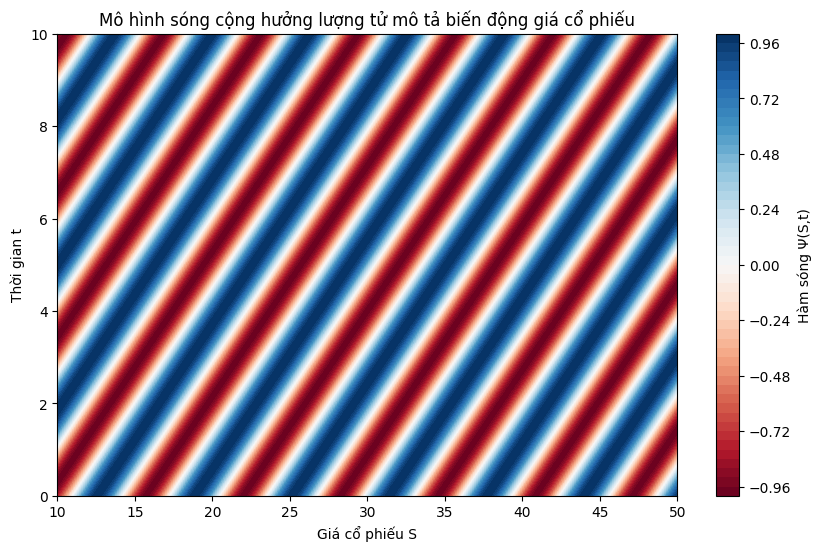

Hạt tự do (không chịu thế năng) có hàm sóng dạng **sóng phẳng**:

$$

\psi(\mathbf{r}, t) = A e^{i(\mathbf{k} \cdot \mathbf{r} - \omega t)},

$$

trong đó:

- A: Hệ số chuẩn hóa.
- $\mathbf{k}:$ Vector sóng, liên hệ động lượng qua $\mathbf{p} = \hbar \mathbf{k}.$
- $\omega:$ Tần số góc, liên hệ năng lượng qua $E = \hbar \omega.$

Hàm sóng này mô tả phân bố xác suất đồng nhất trong không gian, phù hợp với nguyên lý bất định Heisenberg.

---

**Nguyên Lý Chồng Chập**

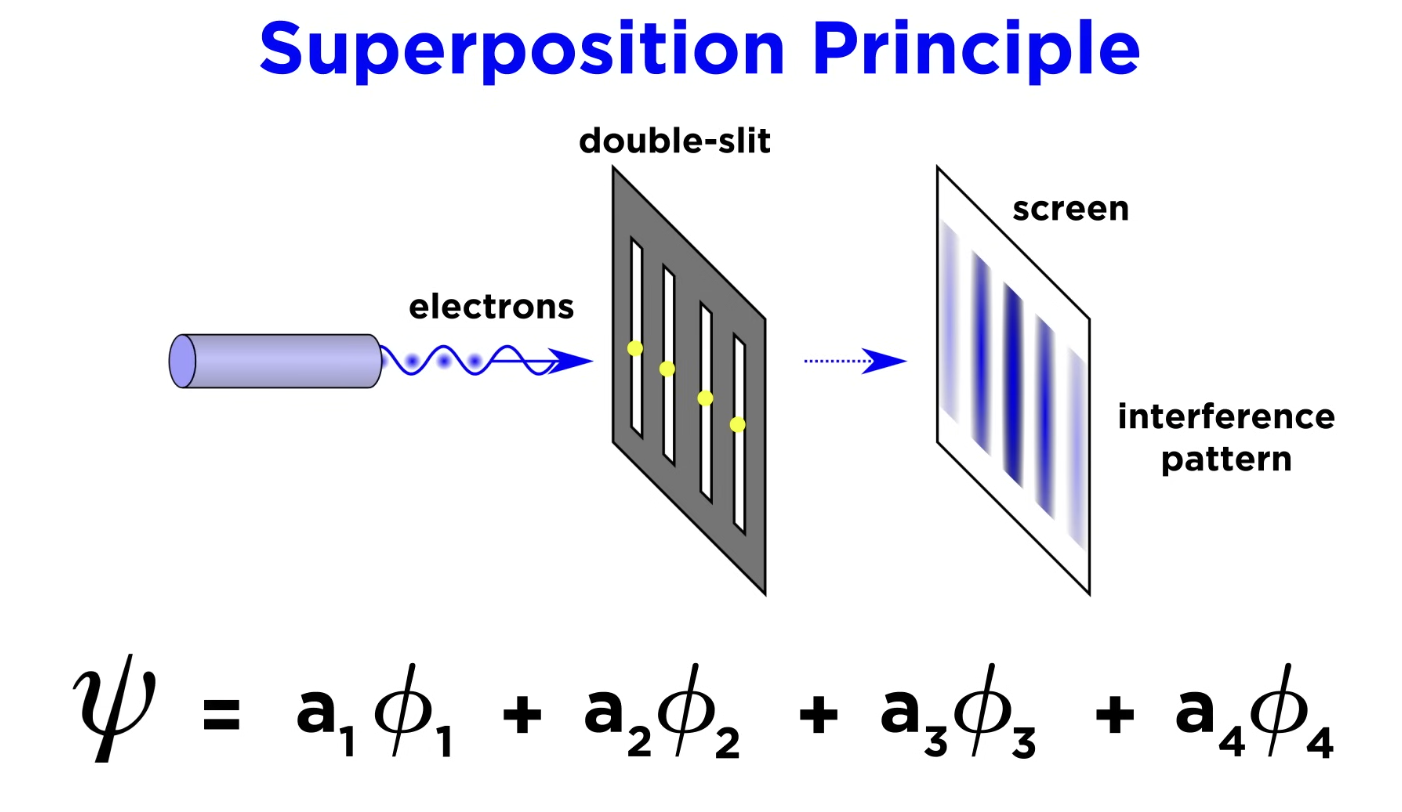

Một trong những hệ quả sâu sắc của cơ học lượng tử là **nguyên lý chồng chập**: Nếu $\psi_1$ và $\psi_2$ là hai trạng thái khả dĩ của hệ, thì tổ hợp tuyến tính

$$
\ket{\psi} = c_1 \ket{\psi_1} + c_2 \ket{\psi_2}\quad (c_1, c_2 \in \mathbb{C})

$$

cũng là một trạng thái hợp lệ. Trước khi đo đạc, hệ tồn tại đồng thời trong tất cả các trạng thái thành phần. Kết quả đo làm **sụp đổ hàm sóng** về một trạng thái riêng của toán tử đo, với xác suất $\braket{\psi_i|\psi}=|c_i|^2.$

**Ví dụ minh họa**:

Xét electron trong thí nghiệm hai khe:

- Trạng thái trước khi đo: $\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{\psi_{\text{khe 1}}} + \ket{\psi_{\text{khe 2}}}).$
- Khi đo vị trí, hệ sụp đổ về $\psi_{\text{khe 1}}$ hoặc $\psi_{\text{khe 2}}$ với xác suất 1/2.

---

**Diễn Giải Thống Kê (Born Rule)**

Xác suất đo đạc không phản ánh thiếu hiểu biết mà là **bản chất xác suất nội tại** của hệ lượng tử. Sự tồn tại của hàm sóng và nguyên lý chồng chập khẳng định:

1. **Tính phi cục bộ**: Trạng thái lượng tử mô tả toàn hệ thống, không thể tách rời thành các phần độc lập.
2. **Tính phi hiện thực**: Các đại lượng vật lý chỉ xác định khi thực hiện phép đo.

Hàm sóng, qua đó, không chỉ là công cụ tính toán mà còn phản ánh thực tại vật lý sâu sắc của thế giới vi mô.



### **Tiên Đề 2: Đại Lượng Quan Sát và Toán Tử**

Mỗi đại lượng vật lý khả sát trong hệ lượng tử (như vị trí $\hat{x}$, động lượng $\hat{p}$, năng lượng $\hat{H}$) tương ứng với một **toán tử tuyến tính** xác định trong không gian Hilbert. Toán tử tác động lên hàm sóng $\psi(x)$, biến đổi nó thành hàm sóng mới $\varphi(x),$ qua đó mô tả giá trị đo được của đại lượng vật lý:

$$

\hat{A} \psi(x) = \varphi(x).

$$

**Toán tử** được định nghĩa là ánh xạ tuyến tính từ không gian hàm sóng vào chính nó. Tương tự hàm số $f(x)$ biến đổi giá trị $x$ thành $y$, toán tử biến đổi hàm $\psi(x)$ thành $\varphi(x).$

---

**Ví Dụ Minh Họa Các Toán Tử**

1. **Toán tử đạo hàm theo thời gian**
    
    Biểu diễn sự tiến triển thời gian của hàm sóng:
    
    $$
    
    \hat{O}_1 \psi = \frac{\partial \psi}{\partial t} = -i\omega \psi.
    
    $$
    
2. **Toán tử vị trí**
    
    Mô tả sự phụ thuộc không gian của hàm sóng:
    
    $$
    
    \hat{O}_2 \psi = x \frac{\partial \psi}{\partial x} = ikx \psi \quad (k \text{ là hằng số sóng}).
    
    $$
    
3. **Toán tử hằng số**
    
    Tác động nhân vô hướng lên hàm sóng:
    
    $$
    
    \hat{O}_3 \psi = \alpha \psi \quad (\alpha \in \mathbb{C}).
    
    $$
    

**Tính chất cơ bản của toán tử**:

1. **Tính tuyến tính**:
    
    $$
    
    (\hat{A} + \hat{B})\psi = \hat{A}\psi + \hat{B}\psi, \quad \beta\hat{A}\psi = \beta(\hat{A}\psi) \quad (\beta \text{ là vô hướng}).
    
    $$
    
2. **Tính Hermitian**:
Toán tử khả sát thỏa mãn $\hat{A} = \hat{A}^\dagger,$ đảm bảo giá trị riêng thực.
    
    $$
    \text{A is Hermitian }\Lrarr  a_{ij}=\overline{a_{ji}}
    $$
    
    **Tính chất toán tử Hermitian**:
    
    1. Giá trị riêng thực.
        
        $$
        \hat A|\psi\rangle=\lambda|\psi\rangle
           \;\Longrightarrow\;
           \lambda=\lambda^{*}\in\mathbb{R}.
        $$
        
    2. Hàm riêng tương ứng giá trị riêng khác nhau trực giao:
        
        $$
        
        \langle \psi_i | \psi_j \rangle = 0 \quad (i \neq j).
        
        $$
        
    3. Tập hàm riêng tạo thành cơ sở đầy đủ cho không gian Hilbert.
        
        $$
          \sum_i |\psi_i\rangle\langle\psi_i|=\hat I,
        $$
        
        nên chúng **span** toàn bộ không gian (có thể chuẩn hoá để thành cơ sở trực chuẩn).
        
3. **Giao hoán tử**:
    
    $$
    
    [\hat{A}, \hat{B}] = \hat{A}\hat{B} - \hat{B}\hat{A} \neq 0 \quad \text{(phản ánh nguyên lý bất định)}.
    
    $$
    

---



### **Tiên Đề 3: Kết Quả Đo Lường**

Kết quả đo đại lượng vật lý tương ứng toán tử $\hat{A}$ luôn là **giá trị riêng** $a_i$ thỏa mãn phương trình trị riêng:

$$

\hat{A} \psi_i = a_i \psi_i.

$$

- Nếu hệ ở trạng thái riêng $\psi_i$, mọi phép đo đều trả về $a_i.$
- Nếu hệ ở trạng thái tổ hợp $\psi = \sum c_i \psi_i$, xác suất đo được $a_i$ là $|c_i|^2.$

**Ví dụ**:

Toán tử vị trí $\hat{x}$ có hàm riêng $\delta(x - x_0)$ và giá trị riêng x_0:

$$

\hat{x} \delta(x - x_0) = x_0 \delta(x - x_0).

$$

**Phổ Toán Tử (Spectrum)**

**Phổ** của toán tử $\hat{Q}$ là tập tất cả giá trị riêng $\lambda$ thỏa:

$$

\hat{Q} \Psi = \lambda \Psi.

$$

- **Phổ rời rạc**: Giá trị riêng cách biệt, hàm riêng chuẩn hóa được (ví dụ: năng lượng nguyên tử hydro).
- **Phổ liên tục**: Giá trị riêng liên tục, hàm riêng không chuẩn hóa (ví dụ: động lượng tự do).

---


### **Tiên Đề 4: Giá Trị Kỳ Vọng**

Giá trị trung bình của đại lượng $\hat{A}$ trong trạng thái $\psi(\mathbf{r}, t):$

$$

\langle \hat{A} \rangle = \int \psi^*(\mathbf{r}, t) \hat{A} \psi(\mathbf{r}, t) \, d\mathbf{r}.
$$

**Điều kiện vật lý**: $\langle \hat{A} \rangle \in \mathbb{R}$, đòi hỏi $\hat{A}$ phải `Hermitian`.

**Nếu $\hat A$ là `Hermitian`, ta có ba mệnh đề then chốt:**

1. **Eigenvalue luôn thực**
2. **Eigenvector khác giá trị riêng → trực giao**
    
    $$
     \lambda_i\neq\lambda_j
       \;\Longrightarrow\;
       \langle\psi_i|\psi_j\rangle=0.
    $$
    
3. **Hệ eigenvector đầy đủ**

**Trạng Thái Xác Định  (State with no uncertainty)**

Trạng thái $\Psi$ gọi là xác định nếu mọi phép đo $\hat{Q}$ đều cho cùng giá trị q:

$$

\hat{Q} \Psi = q \Psi, \quad \sigma^2 = \langle (\hat{Q} - q)^2 \rangle = 0.

$$

- **Hệ quả**: Hàm sóng trong trạng thái xác định là hàm riêng của toán tử khả sát.


**Kết luận**: Các toán tử Hermitian không chỉ mô tả đại lượng vật lý mà còn xác định phép đo thông qua giá trị riêng và hàm riêng. Cấu trúc phổ (rời rạc/liên tục) phản ánh bản chất lượng tử hoặc cổ điển của hệ, trong khi giá trị kỳ vọng liên kết lý thuyết với thực nghiệm thông qua thống kê lượng tử.

---


### **Tiên Đề 5: Sự Tiến Hóa Theo Thời Gian**

Hàm sóng của một hệ lượng tử tiến hóa theo thời gian và có thể được mô tả bởi phương trình **Schrödinger** phụ thuộc thời gian:

$$
\hat{H} \psi(\mathbf{r}, t) = i \hbar \frac{\partial}{\partial t} \psi(\mathbf{r}, t)
$$

Phương trình này mô tả cách trạng thái lượng tử thay đổi theo thời gian dưới ảnh hưởng của **Hamiltonian** (toán tử năng lượng tổng) của hệ.

Trong đó:

- $\hat{H}$ là toán tử Hamiltonian, mô tả năng lượng toàn phần của hệ, được xác định bởi tổng của toán tử động năng và toán tử thế năng:
    
    $$
    \hat{H} = \hat{T} + \hat{V}
    $$
    
    - $\hat{T}:$ Toán tử động năng (liên quan đến sự phân bố động lượng và sự bất định nội tại của hệ).
    - $\hat{V}:$ Toán tử thế năng (phụ thuộc vào các tương tác ngoại vi và sự thay đổi theo thời gian do các yếu tố bên ngoài).

---


# 4. Cơ học lượng tử trong tài chính

## 4.1. Toán tử Giá (Price Operator)

### 4.1.1. Định nghĩa

Toán tử giá (Price Operator) là một đại lượng toán học dùng để biểu diễn phổ trạng thái giá khả dĩ của một tài sản tại một thời điểm, thay vì một giá trị xác định như trong mô hình cổ điển. Về mặt hình thức, khái niệm này có phần tương đồng với biến ngẫu nhiên trong lý thuyết xác suất, song có những khác biệt mang tính bản chất:

- Biến ngẫu nhiên cổ điển: Luôn có một giá trị xác định tồn tại khách quan, dù chưa được quan sát. Sự bất định là hệ quả của việc thiếu thông tin hoặc giới hạn trong khả năng đo lường, chứ không phải thuộc tính nội tại của đối tượng.

- Toán tử giá lượng tử: Mô tả trạng thái giá như một tổ hợp chồng chập của nhiều khả năng cùng tồn tại. Giá tồn tại cùng một lúc nhiều giá trị, chỉ khi có phép đo (tức một giao dịch thực sự xảy ra), trạng thái này mới "sụp đổ" về một giá trị cụ thể. Sự bất định ở đây là đặc trưng nội tại, phản ánh bản chất phi định xứ và siêu vị trí của giá.

### 4.1.2. Biểu diễn ma trận Hermitian

Trong không gian con **$\mathcal{H}_N$** được sinh bởi hệ cơ sở trực chuẩn **$\{ |s_1\rangle, |s_2\rangle, \dots, |s_N\rangle \}$**, với mỗi trạng thái cơ sở được biểu diễn dưới dạng vector cột:

$$

|s_i\rangle =
\begin{bmatrix}
0 \\
\vdots \\
1 \quad (\text{vị trí thứ } i) \\
\vdots \\
0
\end{bmatrix}, \quad \langle s_i | s_j \rangle = \delta_{ij}.

$$

Toán tử Giá **$\hat{S}$** là một toán tử Hermitian (**$\hat{S} = \hat{S}^\dagger$**) có dạng ma trận

$$

\hat{S} =
\begin{bmatrix}
s_1 & S_{12} & \cdots & S_{1N} \\
S_{21} & s_2 & \cdots & S_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
S_{N1} & S_{N2} & \cdots & s_N
\end{bmatrix}, \quad S_{ij} = S_{ji}^*.

$$

- **Phần tử chéo $s_i$:** Giá trị kỳ vọng cổ điển tại trạng thái **$|s_i\rangle$**, tương ứng với giá sàn hoặc giá trần trong thị trường.
    
    $\braket{s_i|\hat S|s_i}=s_i$
    
- **Phần tử ngoài chéo $S_{ij}$ ($i \neq j$):** Mã hóa **tương quan lượng tử** giữa các trạng thái giá $|s_i\rangle$ và $|s_j\rangle$,thoả mãn $S_{ij} = S_{ji}^*$ (Hermitian).
    
    Đặc trưng cho **độ chồng chập** giữa các trạng thái giá. Khi $S_{ij} \neq 0$, hệ tồn tại **vướng víu lượng tử**, dẫn đến hiệu ứng phi cổ điển như arbitrage lượng tử hoặc dao động giá phức tạp.
    
    Đặc trưng cho **nhiễu lượng tử** (quantum noise) gây ra sự chuyển đổi phi cổ điển giữa các trạng thái giá.
    

<aside>
🚨

Note: **Tính Hermitian** $(\hat{S} = \hat{S}^\dagger)$ đảm bảo:

- **Giá trị riêng thực:** $\{s_1, s_2, \dots, s_N\} \in \mathbb{R}$, tương ứng các giá quan sát được.
- **Cơ sở trực chuẩn:** Tồn tại tập eigenstates **$\{ |\psi_k\rangle \}$** trực giao và đầy đủ.
</aside>

**Biểu diễn Trạng thái**

Mọi trạng thái giá **$|\psi\rangle \in \mathcal{H}_N$** đều có thể khai triển trong hai cơ sở:

- **Cơ sở tính toán (Computational Basis):**
    
    $$
    
    |\psi\rangle = \sum_{i=1}^N c_i |s_i\rangle, \quad c_i = \langle s_i | \psi \rangle.
    
    $$
    
- **Cơ sở eigenstates:**
    
    $$
    
    |\psi\rangle = \sum_{k=1}^N d_k |\psi_k\rangle, \quad d_k = \langle \psi_k | \psi \rangle.
    
    $$
    

---

### 4.1.3. Trường hợp đơn giản: Coupling model

Xét hệ hai trạng thái cơ sở **$| \text{ask} \rangle $** và **$| \text{bid} \rangle $**, 

$$
\ket{\psi_s}=c_{ask}*\ket{ask}+c_{bid}\ket{bid}
$$

Toán tử Giá $\hat S$ là toán tử Hermitian có biểu diễn ma trận:

$$

\hat{S} =
\begin{bmatrix}
S_{11} & S_{12} \\
S_{12}^* & S_{22}
\end{bmatrix}.

$$

Trong đó

- **$S_{11}, S_{22}$:** Giá kỳ vọng cổ điển tại trạng thái $\ket{ask}$ và $\ket{bid}$.
    - $\braket{ask|\hat S|ask}=S_{11}$
- **$S_{12}$:** Độ **chồng chập lượng tử** giữa ask và bid, phản ánh khả năng chuyển đổi phi tuyến giữa hai trạng thái.

**Eigenvalues (Observable Prices):**

Các giá trị riêng của $\hat{S}$ được xác định bởi:

$$

s_{ask} = s_{\text{mid}} +\frac{\Delta}{2},
\quad 

s_{bid} = s_{\text{bid}} +\frac{\Delta}{2},
$$

trong đó:

- **$s_{\text{mid}} = \frac{S_{11} + S_{22}}{2}$:** Giá trung bình cổ điển.
- **$\Delta = \sqrt{(S_{11} - S_{22})^2 + 4|S_{12}|^2}$:** Độ lệch do **hiệu ứng lượng tử**, phụ thuộc vào cả chênh lệch giá và độ chồng chập.

Trạng thái giá bây giờ được biểu diên bằng hệ cơ sở mới eigenstate thay vif hệ bid ask ban đầu

$$
\ket{\psi_s}=c_{ask}*\ket{\psi_{ask}}+c_{bid}\ket{\psi_{bid}}
$$

## **4.2. Toán tử Lợi Suất (Returns Operator)**

Toán tử Lợi Suất **$\hat{R}_t$** mô tả biến động giá tương đối, được định nghĩa:

$$
\begin{equation}
\hat{R}_t = \frac{\hat{S}_t}{s_{t-1}} - \hat{I} = \underbrace{z \hat{I}}_{\text{Dịch chuyển trung bình}} + \frac{1}{2} \underbrace{\begin{bmatrix}
\xi & \kappa \\
\kappa^* & -\xi
\end{bmatrix}}_{\text{Toán tử chênh lệch } \hat{E}}
\end{equation}

$$

với:

- **$z = \frac{s_{\text{mid}} - s_{t-1}}{s_{t-1}}$:** Dịch chuyển trung bình theo thời gian.
- $*\hat{E} = \begin{bmatrix} \xi & \kappa \\ \kappa^* & -\xi \end{bmatrix}$:* Toán tử chênh lệch, trong đó:
    - **$\xi = \frac{S_{11} - S_{22}}{s_{t-1}}$:** Chênh lệch giá chuẩn hóa, phân phối chuẩn $\mathcal{N}(0, \sigma_\xi^2)$.
    - **$\kappa = \frac{2S_{12}}{s_{t-1}}$:** Độ chồng chập chuẩn hóa, phân phối chuẩn $\mathcal{N}(0, \sigma_\kappa^2)$.

In [23]:
def generate_random_variables():
    sigma_xi = 0.1  # Độ biến động của ξ
    sigma_k = 0.1  # Độ biến động của κ
    mu_xi = 1  # Giá trị trung bình của ξ
    mu_k = 0  # Giá trị trung bình của κ
    
    z = np.random.normal(0, 1)  
    xi = np.random.normal(mu_xi, sigma_xi)  # Phân phối chuẩn cho ξ
    k =  np.random.normal(mu_k, sigma_k) + 1j * np.random.normal(mu_k, sigma_k)
    return z, xi, k

## 4.3. Price movement

### **4.3.1. Động lực Toán tử Giá**
Toán tử giá **$\hat{S}(t)$** tuân theo phương trình vi phân ngẫu nhiên:

$$

\hat{S}(t + d t) = \hat{S}(t) + d\hat{S}(t), \tag{2.5.1}

$$

Các phần tử ma trận của $\hat{S}$ tại thời điểm $t + d t$ được xác định bởi:

$$


S_{11}(t + d t) = s_{\text{mid}}(t) + \sigma \, dz + \frac{\xi}{2}, \\
S_{22}(t + d t) = s_{\text{mid}}(t) + \sigma \, dz - \frac{\xi}{2}, \\
S_{12}(t + d t) = \frac{\kappa}{2}, \tag{2.5.2}


$$

trong đó:

- **$dz \sim \mathcal{N}(0, 1)$:** Vi phân quá trình Wiener mô tả nhiễu trắng Gauss.
- **$\xi, \kappa$:** Biến ngẫu nhiên độc lập, phân phối chuẩn:
- **$\sigma$:** Độ biến động (volatility) của giá trung bình.

**Tiến hóa Giá Trung bình**

$$

\xi \sim \mathcal{N}(0, \sigma_\xi^2), \quad \kappa \sim \mathcal{N}(0, \sigma_\kappa^2).
$$

Giá trung bình **$s_{\text{mid}}$** tuân theo chuyển động Brownian:

$$

s_{\text{mid}}(t + d t) = s_{\text{mid}}(t) + \sigma \, dz. \tag{2.5.3}

$$

Giá khớp lệnh là một trong 2 giá $s_{bid}$ và $s_{ask}$ dựa trên xác suất xảy ra của nó:

$$
s_{last}(t)=\begin{cases}
s_{ask}(t)&|\langle\psi_{ask}|\psi_s\rangle|^2\\

s_{bid}(t)&|\langle\psi_{bid}|\psi_s\rangle|^2
\end{cases}
$$

### 4.3.2. Tìm Hàm Sóng Tài Sản
Trong nghiên cứu này, thay vì sử dụng toán tử giá **$\hat{S}$**, ta dùng **toán tử chênh lệch giá** $\hat{E}(t)$ để đơn giản hóa tính toán. Toán tử $\hat{E}$ được định nghĩa không thứ nguyên và loại bỏ tham số $s_0$ (giá tham chiếu). Phương trình Schrödinger cho hàm sóng tài sản $\ket{\psi_{s}(t)}$ có dạng:

$$

i\tau \frac{d\ket{\psi_{s}(t)}}{dt} = \hat{E}(t)\ket{\psi_{s}(t)}, \tag{1.34}

$$

với:

- $\tau$: Tham số thời gian đặc trưng (đơn vị: thời gian).
- $\ket{\psi_{s}(t)}=c_{ask}(t)\ket{ask}+c_{bid}(t)\ket{bid} = \begin{bmatrix} c_{\text{ask}}(t) \\ c_{\text{bid}}(t) \end{bmatrix}$: Vector trạng thái lượng tử của tài sản.



Với dạng ma trận của $\hat{E}(t)$:

$$

\hat{E}(t) = \frac{1}{2} \begin{bmatrix} \xi(t) & \kappa(t) \\ \kappa^*(t) & -\xi(t) \end{bmatrix},

$$

phương trình (1.34) tách thành hai phương trình vi phân cho biên độ xác suất **ask** và **bid**:

$$

\begin{cases}
2i\tau \frac{dc_{\text{ask}}(t)}{dt} &= \xi(t)c_{\text{ask}}(t) + \kappa(t)c_{\text{bid}}(t), \tag{1.35} \\
2i\tau \frac{dc_{\text{bid}}(t)}{dt} &= \kappa^*(t)c_{\text{ask}}(t) - \xi(t)c_{\text{bid}}(t). 
\end{cases}

$$


- Hệ số $2i\tau$ xuất phát từ việc chuẩn hóa toán tử $\hat{E}$ và đơn vị thời gian $\tau$.
- $\xi(t)$: Chênh lệch giá chuẩn hóa, đặc trưng cho dao động nội tại giữa ask và bid.
- $\kappa(t)$: Độ chồng chập lượng tử, mô tả tương tác phi tuyến giữa hai trạng thái.


**Giả định:**

- Trong khoảng thời gian ngắn $dt$, giá tài sản không đổi đáng kể → $\xi(t)$ và $\kappa(t)$ là hằng số.

**Phương pháp Giải:**

1. **Biến đổi Laplace:** Áp dụng cho hệ phương trình vi phân tuyến tính với hệ số hằng.
2. **Nghiệm Tổng quát:**
    - Đặt $\epsilon = \sqrt{\xi^2 + |\kappa|^2}$ (thừa số tổng hợp nhiễu).
    - Định nghĩa $\phi = \dfrac{\epsilon t}{2\tau}$ (góc pha tích lũy).

Nghiệm của hệ phương trình có dạng:

$$

\begin{aligned}
c_{\text{ask}}(t) &= \left[ \cos(\phi) - i\frac{\xi}{\epsilon}\sin(\phi) \right] c_{\text{ask}}(0) - i\frac{\kappa}{\epsilon}\sin(\phi) c_{\text{bid}}(0), \\
c_{\text{bid}}(t) &= \left[ \cos(\phi) + i\frac{\xi}{\epsilon}\sin(\phi) \right] c_{\text{bid}}(0) - i\frac{\kappa^*}{\epsilon}\sin(\phi) c_{\text{ask}}(0).
\end{aligned}

$$

### **Giải thích Vật lý:**

- **$\cos(\phi)$ và $\sin(\phi)$:** Phản ánh dao động lượng tử giữa hai trạng thái ask và bid.
- **Tỷ số $\xi/\epsilon$ và $\kappa/\epsilon$:** Đặc trưng cho phân bố năng lượng giữa chênh lệch giá và độ chồng chập.
- **Góc pha $\phi$:** Xác định tốc độ biến đổi trạng thái theo thời gian.

In [24]:

def get_eigenvectors(matrix, return_eigenvalues=False):
    if not isinstance(matrix, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Matrix must be square.")

    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Normalize each eigenvector to unit length
    eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    if return_eigenvalues:
        return eigenvalues, eigenvectors
    return eigenvectors

class couple_wave_model():
    def __init__(self,s11,s12,s22):
        self.s11 = s11
        self.s12 = s12
        self.s21 = np.conjugate(self.s12)
        self.s22 = s22
        self.price_operator = self.get_price_operator()

        self.delta = self.calculate_delta()
        self.smid = (self.s11+self.s22)/2
        self.sask = self.smid + self.delta/2
        self.sbid = self.smid - self.delta/2

    def get_price_operator(self):
        return np.array([[self.s11,self.s12],[self.s21,self.s22]])
    
    def calculate_delta(self):
        # Cal spread
        delta = np.sqrt(((self.s11-self.s22))**2+4*np.abs(self.s12)**2)
        return delta
    

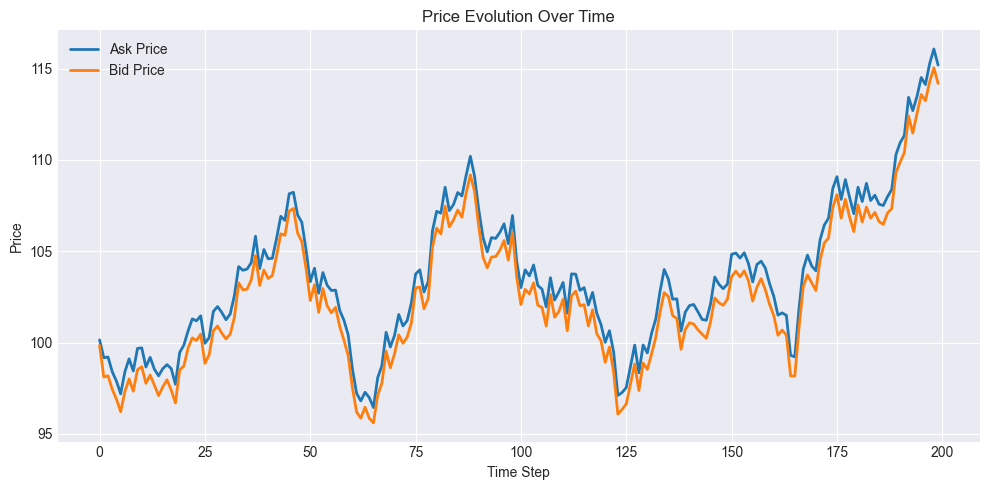

In [ ]:

SOperator_list = []
z, xi, k = generate_random_variables()
s11,s12,s22 = 100,k/2,100
sigma_price = 1
tau = 1
c_ask_0 = np.sqrt(0.6)
c_bid_0 = np.sqrt(1-c_ask_0**2)
Wave_function = []
for t in range(200):
    SOperator_list.append(couple_wave_model(s11,s12,s22))

    epsilon = (xi**2+np.abs(k)**2)**0.5
    phi = epsilon*t/(2*tau)
    Phi_ask_t = (np.cos(phi)-1j*xi/epsilon*np.sin(phi))*c_ask_0-1j*k/epsilon*np.sin(phi)*c_bid_0
    Phi_bid_t = (np.cos(phi)+1j*xi/epsilon*np.sin(phi))*c_bid_0-1j*np.conjugate(k)/epsilon*np.sin(phi)*c_ask_0
    
    Wave_function.append([Phi_ask_t,Phi_bid_t])

    z, xi, k = generate_random_variables()
    s11 = SOperator_list[-1].smid +  sigma_price*z + xi/2
    s22 = SOperator_list[-1].smid +  sigma_price*z - xi/2
    s12 = k/2
Wave_function=np.array(Wave_function)

# --- 1. Plot Bid/Ask and Executed Prices ---
plt.figure(figsize=(10, 5))
plt.plot([i.sask for i in SOperator_list], label="Ask Price", linewidth=2)
plt.plot([i.sbid for i in SOperator_list], label="Bid Price", linewidth=2)
# plt.plot(s_executed, label="Executed Price", linestyle="--", linewidth=1.5)
plt.title("Price Evolution Over Time")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Plot Probability of Ask and Bid ---
probability = np.array([np.abs(Wave_function[i]@get_eigenvectors(SOperator_list[i].price_operator))**2 for i in range(len(SOperator_list))])
ask_prob = probability[:,0]
bid_prob = probability[:,1]
plt.figure(figsize=(10, 5))
plt.plot(ask_prob, label="Ask Probability", linewidth=2)
plt.plot(bid_prob, label="Bid Probability", linewidth=2)
plt.title("Probability of Ask vs Bid Over Time")
plt.xlabel("Time Step")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# # --- 3. Plot Imbalance in Execution ---
imbalance_execution = ask_prob-bid_prob
plt.figure(figsize=(10, 4))
plt.plot(imbalance_execution, color='purple', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Execution Imbalance (Ask - Bid)")
plt.xlabel("Time Step")
plt.ylabel("Imbalance")
plt.grid(True)
plt.tight_layout()
plt.show()


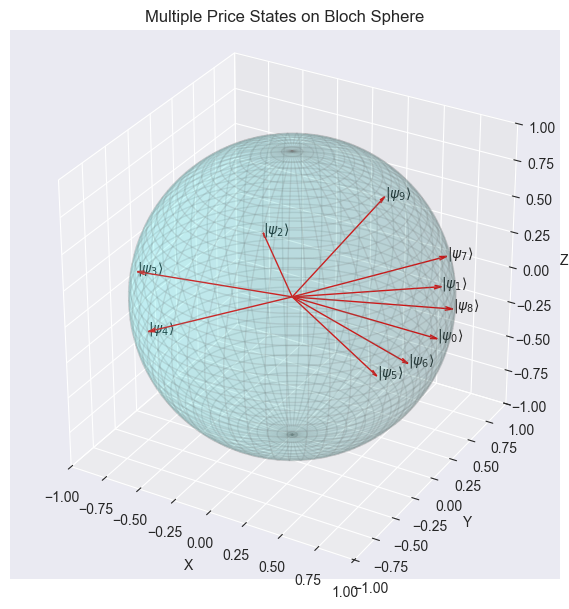

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_multiple_qubits_on_bloch(alpha_list, beta_list):
    assert len(alpha_list) == len(beta_list), "Lists must be the same length"

    # Bloch sphere surface
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xs, ys, zs, color='cyan', alpha=0.1, edgecolor='gray')

    for i, (alpha, beta) in enumerate(zip(alpha_list, beta_list)):
        # Normalize
        norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
        alpha /= norm
        beta  /= norm

        # Convert to Bloch vector
        x = 2 * np.real(np.conj(alpha) * beta)
        y = 2 * np.imag(np.conj(alpha) * beta)
        z = np.abs(alpha)**2 - np.abs(beta)**2

        # Plot vector
        ax.quiver(0, 0, 0, x, y, z, color='r', linewidth=1, arrow_length_ratio=0.05)
        ax.text(x, y, z, f"$|\\psi_{{{i}}}\\rangle$", fontsize=10)

    # Formatting
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Multiple Price States on Bloch Sphere")
    ax.set_box_aspect([1,1,1])
    ax.grid(True)
    plt.tight_layout()
    plt.show()
plot_multiple_qubits_on_bloch(Wave_function[:10,0], Wave_function[:10,1])


# 5. Returns Spectrum


Phương trình:  
$$ i \frac{\partial \psi}{\partial t} = -\frac{\partial^2 \psi}{\partial x^2} $$

**Bước 1: Tách biến**  
Giả sử nghiệm có dạng:  
$$ \psi(x, t) = X(x)T(t) $$ 
Thay vào phương trình:  
$$ i X(x) \frac{dT}{dt} = -T(t) \frac{d^2X}{dx^2} $$ 
Chia cả hai vế cho $ X(x)T(t) $:  
$$ i \frac{1}{T} \frac{dT}{dt} = -\frac{1}{X} \frac{d^2X}{dx^2} = E \quad (\text{hằng số}) $$

**Bước 2: Giải phương trình thời gian**  
$$ i \frac{dT}{dt} = E T $$ 
Nghiệm:  
$$ T(t) = T(0) e^{-iEt} $$

**Bước 3: Giải phương trình không gian**  
$$ -\frac{d^2X}{dx^2} = EX $$ 
Nghiệm tổng quát (sóng phẳng):  
$$ X(x) = A e^{ikx} + B e^{-ikx} \quad \text{với} \quad k = \sqrt{E} $$

**Bước 4: Tổng hợp nghiệm**  
Kết hợp nghiệm thời gian và không gian:  
$$ \psi(x, t) = \int_{-\infty}^{\infty} \left( A(k) e^{ikx} + B(k) e^{-ikx} \right) e^{-ik^2 t} \, dk $$ 
với $ E = k^2 $.

**Bước 5: Gói sóng Gaussian**  
Chọn điều kiện ban đầu dạng Gaussian:  
$$ \psi(x, 0) = \left( \frac{1}{2\pi\sigma^2} \right)^{1/4} e^{-x^2/(4\sigma^2)} e^{ik_0 x} $$ 
Nghiệm tại thời điểm $ t $:  
$$ \psi(x, t) = \frac{1}{\sqrt{1 + i t/(2\sigma^2)}} \exp\left( -\frac{(x - 2k_0 t)^2}{4\sigma^2(1 + i t/(2\sigma^2))} + ik_0 x - i k_0^2 t \right) $$

---

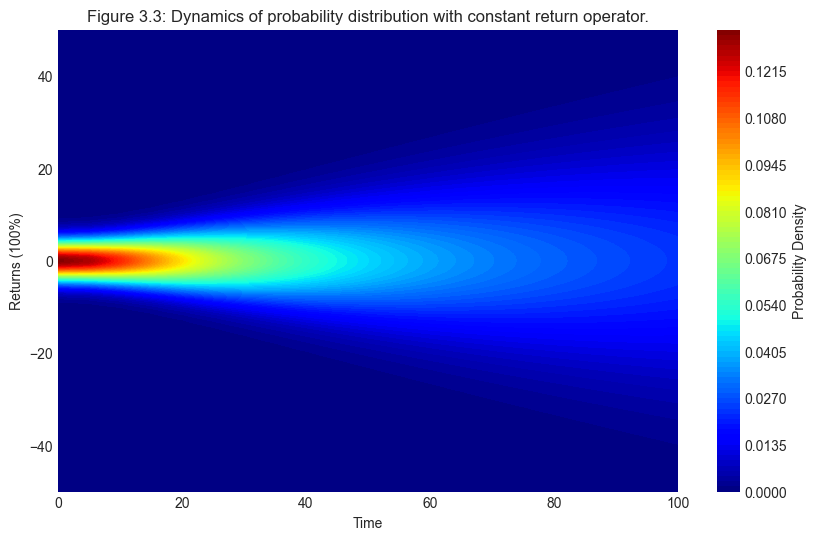

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def free_wave_packet(x, t, sigma=1.0, k0=2.0):
    # Hệ số chuẩn hóa ĐÚNG
    norm = (1 / (2 * np.pi * sigma**2))**(1/4)  # Đã sửa
    denominator = 1 + 1j * t / (2 * sigma**2)
    exponent = -(x - 2*k0*t)**2 / (4 * sigma**2 * denominator) + 1j * k0 * (x - k0*t)
    psi = norm * np.exp(exponent) / np.sqrt(denominator)
    return psi
# Tham số mô phỏng
time = np.linspace(0, 1000, 200)
x_range = np.linspace(-50, 50, 500)
T, X = np.meshgrid(time, x_range)

# Tính mật độ xác suất
probability = np.abs(free_wave_packet(X, T, sigma=3.0, k0=0.0))**2  # Điều chỉnh sigma và k0

# Vẽ đồ thị contour
plt.figure(figsize=(10, 6))
plt.contourf(T, X, probability, levels=100, cmap=cm.jet)
plt.colorbar(label='Probability Density')
plt.title('Figure 3.3: Dynamics of probability distribution with constant return operator.')
plt.xlabel('Time')
plt.ylabel('Returns (100%)')
plt.ylim(-50, 50)
plt.xlim(0, 100)
plt.show()

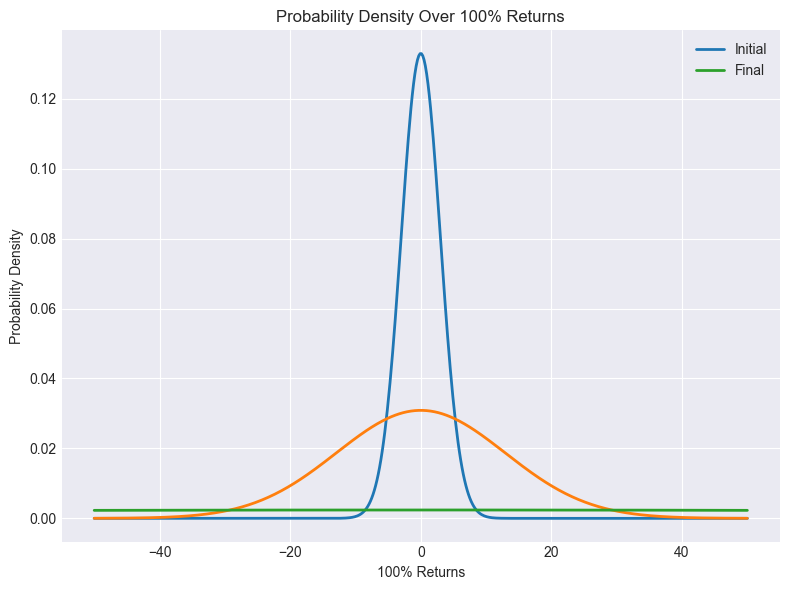

In [ ]:

# Create a larger figure
plt.figure(figsize=(8, 6))

# Plot each series with a thicker line
plt.plot(x_range, probability[:, 0], label="Initial", linewidth=2)
plt.plot(x_range, probability[:, 15], linewidth=2)
plt.plot(x_range, probability[:, -1], label="Final", linewidth=2)

# Add labels, a title, a grid, and a legend
plt.xlabel("100% Returns")
plt.ylabel("Probability Density")
plt.title("Probability Density Over 100% Returns")
plt.grid(True)
plt.legend()

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


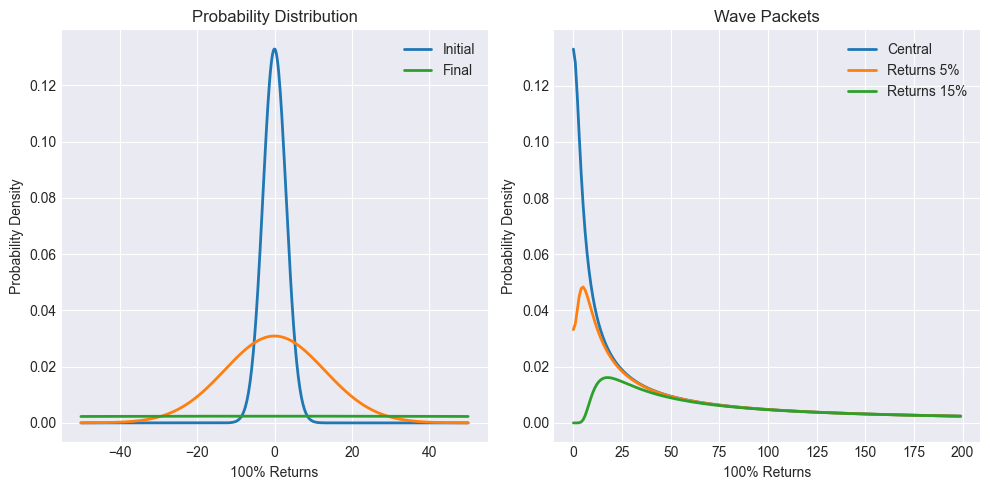

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# -- Subplot 1: Probability Distributions --
ax1.plot(x_range, probability[:, 0],  label="Initial", linewidth=2)
ax1.plot(x_range, probability[:, 15],             linewidth=2)
ax1.plot(x_range, probability[:, -1], label="Final",   linewidth=2)

ax1.set_xlabel("100% Returns")
ax1.set_ylabel("Probability Density")
ax1.set_title("Probability Distribution")
ax1.legend()
ax1.grid(True)

# -- Subplot 2: Wave Packets --
ax2.plot(np.abs(free_wave_packet(0,  time, sigma=3.0, k0=0.0))**2,  label="Central",       linewidth=2)
ax2.plot(np.abs(free_wave_packet(5,  time, sigma=3.0, k0=0.0))**2,  label="Returns 5%",    linewidth=2)
ax2.plot(np.abs(free_wave_packet(15, time, sigma=3.0, k0=0.0))**2,  label="Returns 15%",   linewidth=2)

ax2.set_xlabel("100% Returns")
ax2.set_ylabel("Probability Density")
ax2.set_title("Wave Packets")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

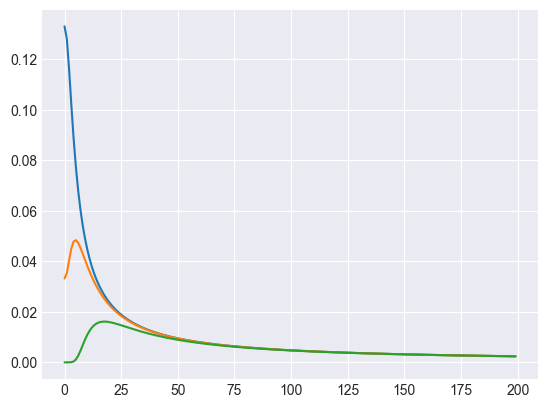

In [ ]:
plt.plot(np.abs(free_wave_packet(0, time, sigma=3.0, k0=0.0))**2,label="Central")
plt.plot(np.abs(free_wave_packet(5, time, sigma=3.0, k0=0.0))**2,label="Returns 5%")
plt.plot(np.abs(free_wave_packet(15, time, sigma=3.0, k0=0.0))**2,label="Returns 15%")

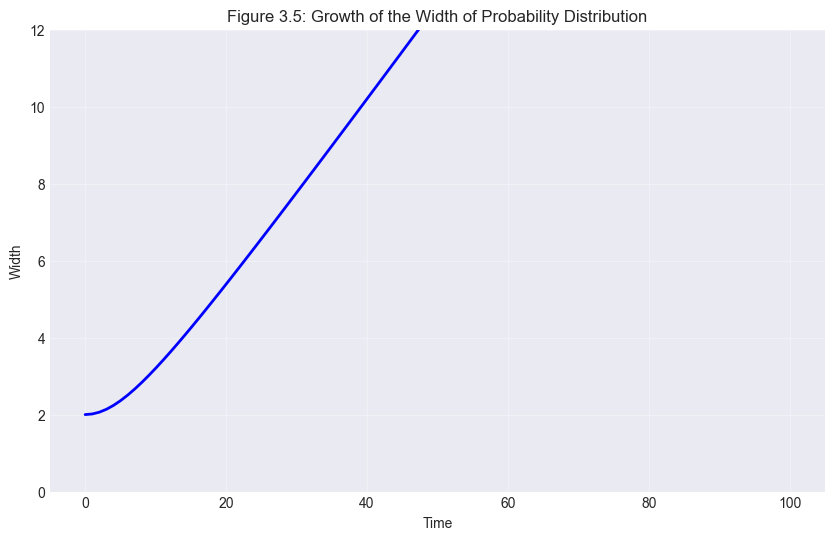

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def width_vs_time(t, sigma=5.0):
    """Tính độ rộng của phân bố xác suất theo thời gian."""
    return sigma * np.sqrt(1 + t**2 / (4 * sigma**4))

# Tham số mô phỏng
time = np.linspace(0, 100, 100)
width = width_vs_time(time, sigma=2.0)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(time, width, 'b-', linewidth=2)
plt.title("Figure 3.5: Growth of the Width of Probability Distribution")
plt.xlabel("Time")
plt.ylabel("Width")
plt.grid(alpha=0.3)
plt.ylim(0, 12)
plt.show()